<a href="https://colab.research.google.com/github/Gabriel-Mourad/Practica_3_INAM/blob/main/Copia_de_Students_INAM_03_kernel_methods_SVM_part_b_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ambient Intelligence: Kernel methods and Support Vector Machine

In this lab session we are going to see:



1.   Introduction to kernel methods and RBF Networks.
2.   Support Vector Machine for classification.

![texto alternativo](https://drive.google.com/uc?id=1aQVi8Llx2UfLdhh5wtSXf7xpXR6lFlOW)

This notebook focuses on the SVM.

Support Vector Machines (SVM from now on) are a set of supervised learning methods used for classification, regression and outliers detection. It presents the following advantages when compared to other methods:


*   Effective in high dimensional spaces.
*   Effective when the number of dimensions is greater than the number of samples.
* Once trained it only needs a subset of the data in order to prodice the decision function, this subsets of observations are called the support vectors. So this method is memory efficient and very fast when used in an online procedure like a service that needs to produce forecasts under demand.
* Lastly, SVM permits to use different Kernel functions in a natural way. Kernel functions enhance the power of the SVM method providing tools that permit to classify data that is not linearly separable in the original space and also permits to work with other distances beyond the Euclidean one, permitting to do classification in other types of data like documents, graphs, sequences, etc.



SVM where produced with optimization at mind and this can be noticed in:
* Its a quadratic programming problem, so it will provide the global optima.
* Permits to control the complexity of the model permitting violations on the margins through slack variables in order to have a control of the overfit in the training data.

The objective of the SVM is to maximize the margin around the separating hyperplane. The margin is defined by the observations that are closer to the separating hyperplane. Once we have these observations (the support vectors), the rest of the data is no longer needed.

SVM has two formulations where the most usual one is the dual as it introduces naturally the Kernel function.



Next we will do an overview about the inner mechanics of the algorithm.

## Intuitive formulation/derivation of the SVM

Our goal is to classify observations into two classes (for simplicity, although it can be later extended to M classes). In order to separate observations from one class to the other, we can make use of a hyperplane (a line in a 2D space):
$$ g(x)=\langle \textbf{w},\textbf{x}\rangle+b$$
**Where to place this hyperplane?**

We want to place the hyperplane in a place in the space where all observations of one class are in one side of it and the others in the other side. Moreover, this place will be defined as the place with the observations that are harder to classify because observations from one class and the other are very close between them. So this hyperplane will be placed at the space of minimum distance between observations and we will call it the **functional margin**.

**But in a continuous space there can be infinite possible hyperplanes, which one is the *best* one?**

It turns out that the optimal separating hyperplane (OSH) is the one that is at minimum distance from all the observations and at the same time it is at maximum distance of the more closest observations to it. So we need to find two more hyperplanes at the maximum distance between the functional margin and the closest obsevations to it that satisfy that the distance is the greatest one. We will call them the **geometric margins**

![The OSH](https://drive.google.com/uc?export=view&id=1YiiL5PoP7UOpUZESgVdQSYSNNlA5UB7l) 

Encoding our classes as $t_n= \left\{-1,+1\right\}$ we want the functional margin to be:

$g(x)> 0$, when $t_n=+1$ and at the same time
$g(x)< 0$, when $t_n=-1$.

This can be simplified as:

$ t_n(g(x))>0$ for $(1 \leq n \leq N)$

Given the plane (functional margin) $\pi:g(x)=0$ the distance $d(\textbf{x},\pi)=\frac{\lvert g(\textbf{x})\lvert}{\lvert\lvert \textbf{w}\lvert\lvert}$ is the geometrical margin of $\textbf{x}$

So OSH for linearly separated data is the one that maximizes the geometrical margin:
$$\max_{\textbf{w},b}\left\{\min_{1\leq n\leq N}d(\textbf{x},\pi)\right\}$$ subject to $$t_n(\langle \textbf{w},\textbf{x}\rangle+b)\gt 0$$ for all $(1\leq n\leq N)$.


The next step is to rescale $\textbf{w},b$ so the closests points to the hyperplane $\pi$ will be $\lvert\langle \textbf{w},\textbf{x}\rangle+b\lvert = 1$. Those points are the *support vectors* (SVs), and are defined by $\frac{\textbf{ x}_n}{\lvert\langle \textbf{w},\textbf{x}_n\rangle+b\lvert }= 1$

The margin will then be twice the distance of any SV to the plane $\pi$:
$$m=2d(\textbf{x}_{SV},\pi)=\frac{2}{\lvert\lvert\textbf{w}\lvert\lvert}$$ since $\lvert g(\textbf{x}_{SV}) \lvert=1$
* Therefore the OSH is given by solving:
$$\max_{\textbf{w},b}\left\{\frac{2}{\lvert\lvert\textbf{w}\lvert\lvert}\right\} $$ 
$$s.t.:$$
$$t_n(\langle \textbf{w},\textbf{x}\rangle+b)\ge 1 ,\ \quad 1 \le n \le N$$
![Geometrical view of the OSH](https://drive.google.com/uc?export=view&id=1G5IYmgN5afROU6XfxOzdq4YuJCgRNH5X) 

*The Loss function*:

Here we will first introduce the Loss function used in SVM, called the **hinge loss**
$$ max(1-t_ng(\textbf{x}_n),0):=(1-t_ng(\textbf{x}_n))_+$$

Those values where $t_ng(\textbf{x}_n)\lt1$ will count towards the error.

*SVM hard margins primal formulation*:

Because we scaled the margins, the 2 in the numerator does not affects the formula and we can get rid of it. Also note that maximizing $1/\lvert\lvert\textbf{w}\lvert\lvert$ is the same thing as minimizing $\lvert\lvert\textbf{w}\lvert\lvert^2$ so we can now have the first optimization formulation of the SVM, called the SVM with hard margins:

$$\min_{w,b}\quad \frac{1}{2}||w||^2 $$
$$s.t.:$$
$$t_n(\langle \textbf{w},\textbf{x}\rangle+b)\ge 1 ,\ \quad 1 \le n \le N$$

This optimization problem can be solved by quadratic programming techniques. Because is quadratic => is convex and so there will be a **unique GLOBAL solution**.

*SVM soft margins primal formulation*:

It is very unirealistic that the data to be linear separable so a modification is made in order to soft the constraints and permit "violating" on the margins. These observations that violate the margins will be inside the margins (so when evaluated their absolute value will be $\le 1$ and will count as an error. Controling the margins to permit violations on the constraints leads to the soft margin formulation:

$$\min_{w,b}\quad \frac{1}{2}||w||^2 + C \sum_{n=1}^{N} (1-t_ng(\textbf{x}_n))),\ \quad C \ge 0 $$


Notice that the added term to the objective function is a control hyperparameter $C$ and the total hinge loss.

This formulation is rewritten as another quadratic programming problem by introducing a set of margin violations variables called **slack variables**, $\epsilon_n$, for each $\textbf{x}_n$




$$\min_{w,b,\left\{\epsilon_n\right\}}\quad \frac{1}{2}||w||^2 + C \sum_{n=1}^{N} \epsilon_n $$

$$s.t.:$$

$$t_n(\langle \textbf{w},\textbf{x}\rangle+b)\ge 1-\epsilon_n$$ and $$\epsilon_n\ge0 $$
for $$\quad 1 \le n \le N$$

* The term $\sum_{n=1}^{N} \epsilon_n $ acts as an upper bound on the number of training errors.
* This is a soft margin because $\epsilon_n\gt0$ would violate the original constraint.
* The optimal slacks satisfy $\epsilon_n=(1-t_ng(\textbf{x}_n))_+$

*SVM soft margins dual formulation*:

Soon we will arrive to the final SVM formulation, the one that arises from optimization theory, Lagrange multipliers, duality gap and dual formulation.

Define the Lagrangian as:
$$\mathcal{L}(\pmb{x},\pmb{ \alpha },\pmb{\beta})=f(\pmb(x))+\sum_{j=1}^k\pmb{\alpha}_jg_j(\pmb{x})+\sum_{j=1}^l\pmb{\beta}_jh_j(\pmb{x})$$ where $f,\ g_j,\ h_j$ are continuously differentiable functions.

We formulate the Lagrangian for the SVM:
$$\mathcal{L}_P=\frac{1}{2}\lvert\lvert\pmb{w}^2\lvert\lvert-\sum_{n=1}^N\pmb{\alpha}_n\left\{\pmb{t}_n(\langle \textbf{w},\textbf{x}\rangle+b)-1+\pmb{\epsilon}_n\right\}+C\sum_{n=1}^N\pmb{\epsilon}_n-\sum_{n=1}^N\pmb{\mu}_n\pmb{\epsilon}_n$$

Finally we get the final form of the SVM, **the dual formulation**:
$$\max_\left\{\alpha_n\right\} 
\mathcal{L}_D=\sum_{n=1}^N\alpha_n-\frac{1}{2}\sum_{n=1}^N\sum_{m=1}^N\alpha_n\alpha_mt_nt_m\langle \textbf{x}_n,\textbf{x}_m\rangle
$$

$$s.t.:$$
$$ 0 \le \alpha_n \le C ,\ (1\le n\le N)$$ and
$$\sum_{n=1}^N \alpha_n t_n = 0$$

* Minimization is only with respect to $\alpha_n$
* The optimization only depends on the observations and induces naturally the use of kernels.
* The number of parameters can be as large as $N$.

$\alpha_n$ explainations:
* $\alpha_n=0$ -> $t_n g(\pmb{x}_n)\gt1$ and $\epsilon_n=0$ then $\pmb{x}_n$ is **not a SV**.
* $\alpha_n \in (0,C)$ -> $t_n g(\pmb{x}_n) = 1 $ and $\epsilon_n=0$ then $\pmb{x}_n$ is a **non-bound SV**.
* $\alpha_n = C$ -> $t_n g(\pmb{x}_n) \lt 1 $ and $\epsilon_n \gt 0$ then $\pmb{x}_n$ is a **bound SV**. If $\epsilon_n \gt 1$ implies $\pmb{x}_n$ is a training error.

*Extending to non-linear*:
Remember that the Kernel function $K(\cdot,\cdot)$ is used to implicitly make a nonlinear feature map, moreover, it provides the distances of our observations in the high dimensional space without the need to compute the observations in that high dimensional space, making it very effective in order to find the hyperplane that separates them. The most common Kernel functions are:
* Polynomial kernel.
* RBF kernel.

All that it is needed to use the power of kernels is to have an inner product. The dual formulation of the SVM provides it in a natural way we just need to substitute $\langle \pmb{x}_n,\pmb{x}_m\rangle$ by $\langle \phi(\pmb{x}_n),\phi(\pmb{x}_m)\rangle$ and then build the OSH in the feature space.



### Other considerations and extended information

The loss function (or critterion) is known as the Hinge Loss and uses the margin defined by the SVM in order to classify the observations.
![](https://drive.google.com/uc?id=1a6aGS6oo5DAVBvgkCFeFZyFHXoBa3Tll)

which formula is:

$$H_1(z)=max(0,1-z)$$

*Slack variables*: Slack variables appear as a result of controling the margin through the $C$ hyperparameter. Remember that we control the complexity of the SVM through this hyperparameter in the following manner: as larger is $C$, lower is our margin and more overfit to the training data will present the model. On the other hand, a low C value means a large separating hyperplane and so, we will have observations inside the margin (violating the constraints). Those observations that are inside the margins are called the slack variables and are the ones that count towards the error. All of this means that $C$ is the key point on achieving a good model when using SVM as we can tradeoff generalization by error easily. 

If ones observes carefully the formulations of the primal and dual it can see the slack variables, there it can be seen clearly how the hyperparameter $C$ controls the observations that we permit as violation of the margins (errors).

Check this link for visual intuition on slack variables [Slack variables](https://www.quora.com/What-is-the-purpose-for-using-slack-variable-in-SVM)

Just one final comment: In the two class classification (or classic SVM) the target classes must be encoded as 1 and -1.

For those wishing to dig more on the method, I recommend the following lecture
[slides](http://web.mit.edu/6.034/wwwbob/svm-notes-long-08.pdf), but a lot of people says also that Andrew Ng Coursera Notes on SVM are very good too.

Another source of information: [SVM tutorial](https://www.svm-tutorial.com/2014/11/svm-understanding-math-part-1/)

#### Exercise
**What is the effect of using $C=\infty$?**

Cuanto más grande es C, menor es el margen funcional. Pues la frontera de decisión será más pequeña. Si C disminuye, aumenta el margen funcional y la frontera de decisión se hace mayor.

**What is the relationship between the number of SV and the values of $C$?**

Los SV son los vectores donde se soporta el hiperplano de separación, y el magen funcional se define como la distancia mínima entre las observaciones y el hiperplano. Como C define la magnitud del margen, C definirá los SV.

**How $C$ makes possible to control the overfitting?**

Como C define el margen de decisón, si se usa un margen de decisión muy pequeño, no se consigue que el modelo sea capaz de generalizar, ya que no será capaz de clasificar correctamente aquellos puntos fuera de los margenes. 
Es decir, quedará un modelo sobredimensionado. 

**Which information is provided by the SVs from the perspective of the dataset?**

Desde el punto de vista del dataset los SV nos indican la distancia que hay entre ellos, por lo tanto, facilmente se pueden distringuir las distintas clases que existen dentro del conjunto únicamente observando los SV.

**Define the characteristics of a dataset in which the SVM can be the perfect candidate.**

SVM es muy efectiva en conjuntos de datos con varias dimensiones, como puede ser la segmentación y clasificación de imagenes o la categorización de textos ya caracteres.

## SVM Exercise
Use the SVM in order to provide different models that use the following Kernel functions:
* Linear
* Polynomial
* RBF

using the Iris dataset (remember to split it train and test). Then, solve the following questions:

1. Compare the results obtained with the different Kernel functions.
2. Indicate which observations are the support vectors.
3. Use different values for the C (margin) hyperparameter.
4. Use the Polynomial kernel and try different values for the degree of the polynomial (be careful to not choice large numbers as it can be computationally expensive).
5. Use the RBF kernel and try different values for the gamma (radius) parameter.

In [2]:
from sklearn import svm
import numpy as np
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt

([], <a list of 0 Text major ticklabel objects>)

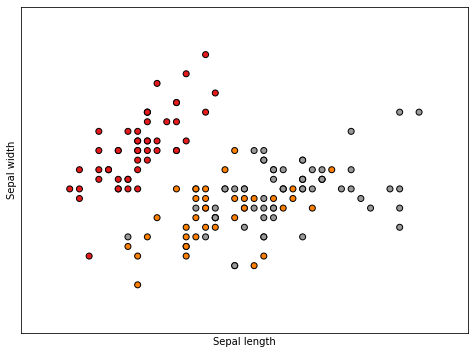

In [3]:
iris_data = load_iris()
seed = 20210512
X = iris_data.data
y = iris_data.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

I will put the first stone in order to provide intuitions about how to use SVM using the Linear one. It is recommended that you become familiar with the documentation of SKLearn because it has a nice paragraph with a lot of information for working wit SVM: [Tips on practical use of SVM](https://scikit-learn.org/stable/modules/svm.html#tips-on-practical-use)

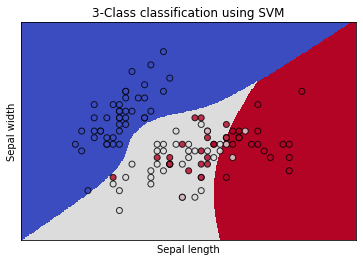

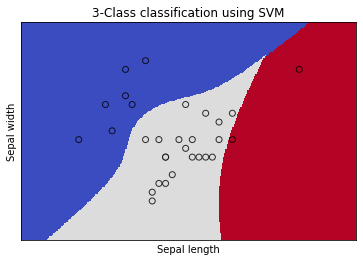

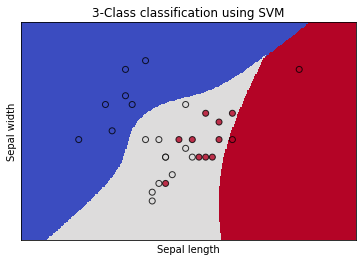

Accuracy: 0.6666666666666666


In [5]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def decision_boundary_plot(X, Y, model):
  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  h = .02
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z)
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.coolwarm)

  # Plot also the training points
  plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm, alpha=0.8, edgecolors='k')
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')
  plt.xticks(())
  plt.yticks(())
  plt.title('3-Class classification using SVM')
  plt.axis('tight')
  plt.show()


seed = 17
# Note: I work only with the first two dimensions in order to provide the 
# visualization of the results, but you will need to use all the variables
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=seed)
standard_scaler_model = StandardScaler().fit(X_train[:,:2]) 
X_train = standard_scaler_model.transform(X_train[:,:2])
X_test = standard_scaler_model.transform(X_test[:,:2])
lin_clf = svm.SVC(kernel="poly", C=500, degree=3)
lin_clf.fit(X_train,y_train)

decision_boundary_plot(X_train,y_train, lin_clf)


y_pred = lin_clf.predict(X_test)
decision_boundary_plot(X_test,y_pred, lin_clf)
decision_boundary_plot(X_test,y_test, lin_clf)

print(f"Accuracy: {lin_clf.score(X_test, y_test)}")
 





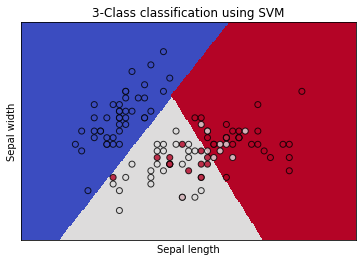

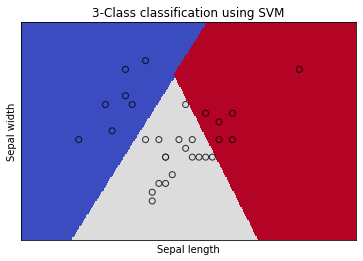

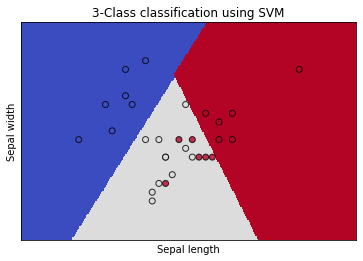

Accuracy: 0.8


In [6]:
seed = 17
# Note: I work only with the first two dimensions in order to provide the 
# visualization of the results, but you will need to use all the variables
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=seed)
standard_scaler_model = StandardScaler().fit(X_train[:,:2]) 
X_train = standard_scaler_model.transform(X_train[:,:2])
X_test = standard_scaler_model.transform(X_test[:,:2])
lin_clf = svm.SVC(kernel="linear", C=500)
lin_clf.fit(X_train,y_train)
decision_boundary_plot(X_train,y_train, lin_clf)

y_pred = lin_clf.predict(X_test)
decision_boundary_plot(X_test,y_pred, lin_clf)
decision_boundary_plot(X_test,y_test, lin_clf)
print(f"Accuracy: {lin_clf.score(X_test, y_test)}")

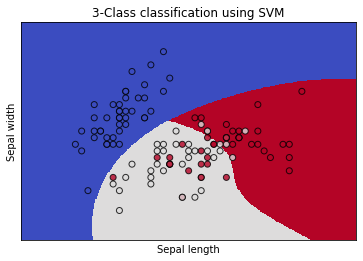

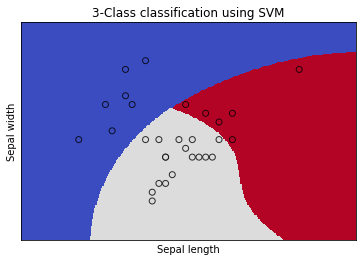

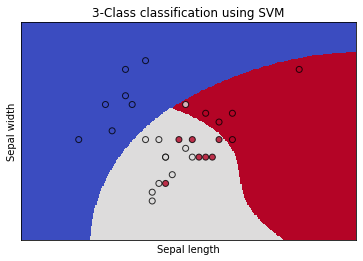

Accuracy: 0.7333333333333333


In [9]:
seed = 17
# Note: I work only with the first two dimensions in order to provide the 
# visualization of the results, but you will need to use all the variables
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=seed)
standard_scaler_model = StandardScaler().fit(X_train[:,:2]) 
X_train = standard_scaler_model.transform(X_train[:,:2])
X_test = standard_scaler_model.transform(X_test[:,:2])
lin_clf = svm.SVC(kernel="rbf", C=500, gamma = 0.5)
lin_clf.fit(X_train,y_train)
decision_boundary_plot(X_train,y_train, lin_clf)

y_pred = lin_clf.predict(X_test)
decision_boundary_plot(X_test,y_pred, lin_clf)
decision_boundary_plot(X_test,y_test, lin_clf)
print(f"Accuracy: {lin_clf.score(X_test, y_test)}")

1: Usando distintas funciones Kernel se observan distintas fronteras de decisión, eso conlleva a distintas precisiones.
El modelo más preciso es usando la función lineal con un 80% de precisión, seguido de la función RBF con un 73% y de la función polonómica con un 67%.
Dado que el conjunto de datos es sencillo y tiene pocas dimensiones, con la función lineal se ha conseguido un buen resultado. Para conjuntos de datos más complejos, otras funciones serian más adecuadas.

3: Si variamos el tamaño del margen en el kernel con RBF, observamos que al reducirlo disinuimos la precision del modelo, y al aumentarlo considerablemente también. No se ha encontrado una C que aumente la precisión por encima del 73%.

4: Modificando el grado del Kernel polinómico se obtienen distintas precisiones según el grado del polinomio:
grado2: 0.57
grado3: 0.66
grado4: 0.53
grado5: 0.63

5: Modificando el parámetro gamma del Kernel RBF la precisión varia levemnte, cómo mínimo se obtiene un 70% de precisión y un 73% de precisión para un radio de 0.5. El resto de valores entre 0.1 y 10, obtiene una precisión del 70%.

###Exercise 1
Finally, the last exercise of our journal through Machine Learning methods.
We are going to use a well known dataset: the Wisconsin breast cancer dataset for classification. The dataset has:
* 2 classes
* Samples per class: 212 malignant, 357 benign. Total of 569 samples.
* 30 dimensions (features). Which all are real numbers and positive.


1. radius (mean of distances from center to points on the perimeter)
2. texture (standard deviation of gray-scale values)
3. perimeter
4. area
5. smoothness (local variation in radius lengths)
6. compactness (perimeter^2 / area - 1.0)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
9. symmetry 
10. fractal dimension ("coastline approximation" - 1)

The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.  For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

The objective of the exercise is to try 2 different classifiers from different families where one of them must be the SVM (i.e: SVM and MLP). Compare the results and provide explanations on the line of:
* Accuracy.
* Hyper tunning experience.
* Train speed.
* Model personal experience.
* Model information after the fit. (i.e: The most important observations are the ones defined as support vector machines).
* Important features are X, Y and Z.
* Missclassifications identification and explanations.
* Etc.

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
dataset = load_breast_cancer()
for key, value in dataset.items():
  print("="*50)
  print(f"{key}:")
  print(value)

X = dataset.data
y = dataset.target

data:
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 